# Анализ статистики игроков NBA: EDA


## 1. Загрузка библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Загрузка наборов данных

In [ ]:
df_Players = pd.read_csv('Players.csv').drop(columns=['Unnamed: 0'])
df_SS = pd.read_csv('Seasons_Stats.csv')
df_PD = pd.read_csv('player_data.csv')

## 3. Первоначальный осмотр данных

### 3.1 Анализ таблицы `df_Players`

In [ ]:
df_Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height       3921 non-null   float64
 2   weight       3921 non-null   float64
 3   collage      3573 non-null   object 
 4   born         3921 non-null   float64
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(3), object(4)
memory usage: 214.6+ KB


Описание столбцов DataFrame `df_Players`

1. **ID**
   - **Описание**: Этот столбец представляет собой индекс.
   - **Тип данных**: int64
   - **Количество непустых значений**: 3922

2. **Player**
   - **Описание**: Имя игрока. Этот столбец содержит имена всех игроков.
   - **Тип данных**: object
   - **Количество непустых значений**: 3921 (1 пропущенное значение)

3. **height**
   - **Описание**: Рост игрока в дюймах.
   - **Тип данных**: float64
   - **Количество непустых значений**: 3921 (1 пропущенное значение)

4. **weight**
   - **Описание**: Вес игрока в фунтах.
   - **Тип данных**: float64
   - **Количество непустых значений**: 3921 (1 пропущенное значение)

5. **collage**
   - **Описание**: Университет или колледж, который игрок посещал.
   - **Тип данных**: object
   - **Количество непустых значений**: 3573 (349 пропущенных значений)

6. **born**
   - **Описание**: Год рождения игрока.
   - **Тип данных**: float64
   - **Количество непустых значений**: 3921 (1 пропущенное значение)

7. **birth_city**
   - **Описание**: Город рождения игрока.
   - **Тип данных**: object
   - **Количество непустых значений**: 3452 (470 пропущенных значений)

8. **birth_state**
   - **Описание**: Штат или регион рождения игрока.
   - **Тип данных**: object
   - **Количество непустых значений**: 3439 (483 пропущенных значений)


In [ ]:
df_Players.head()


,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [ ]:
df_Players.describe(include='all')

,Player,height,weight,collage,born,birth_city,birth_state
count,3921,3921.000000,3921.000000,3573,3921.00000,3452,3439
unique,3921,NaN,NaN,422,NaN,1264,128
top,Curly Armstrong,NaN,NaN,University of Kentucky,NaN,Chicago,California
freq,1,NaN,NaN,89,NaN,114,344
mean,NaN,198.704922,94.783219,NaN,1962.37975,NaN,NaN
std,NaN,9.269761,12.039515,NaN,20.33491,NaN,NaN
min,NaN,160.000000,60.000000,NaN,1913.00000,NaN,NaN
25%,NaN,190.000000,86.000000,NaN,1948.00000,NaN,NaN
50%,NaN,198.000000,95.000000,NaN,1964.00000,NaN,NaN
75%,NaN,206.000000,102.000000,NaN,1979.00000,NaN,NaN


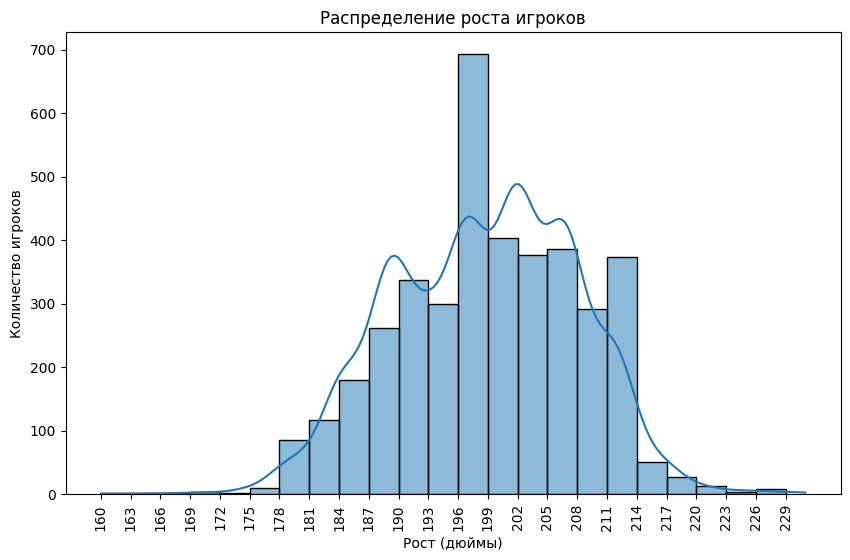

In [ ]:
# Задаем границы бинов с шагом 1
bins = np.arange(df_Players['height'].min(), df_Players['height'].max() + 1, 3)

# Отрисовка гистограммы с шагом 1 по оси X
plt.figure(figsize=(10, 6))
sns.histplot(df_Players['height'], bins=bins, kde=True)
plt.title('Распределение роста игроков')
plt.xlabel('Рост (дюймы)')
plt.ylabel('Количество игроков')
plt.xticks(bins, rotation=90)  # Устанавливаем шаг 1 на оси X
plt.show()


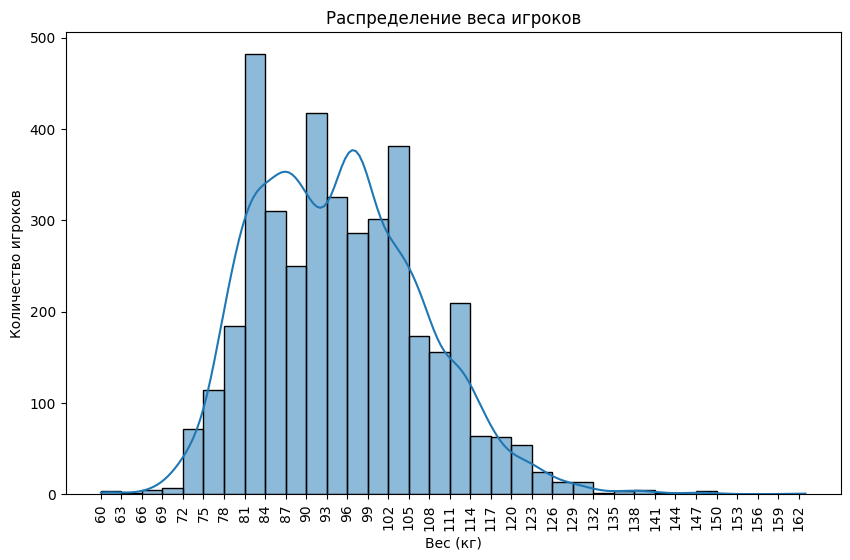

In [ ]:
# Задаем границы бинов с шагом 1 кг
bins_kg = np.arange(df_Players['weight'].min(), df_Players['weight'].max() + 1, 3)
# Распределение веса игроков
plt.figure(figsize=(10, 6))
sns.histplot(df_Players['weight'] , bins=bins_kg, kde=True)
plt.title('Распределение веса игроков')
plt.xlabel('Вес (кг)')
plt.xticks(bins_kg, rotation=90)  # Поворачиваем подписи на 90 градусов
plt.ylabel('Количество игроков')
plt.show()

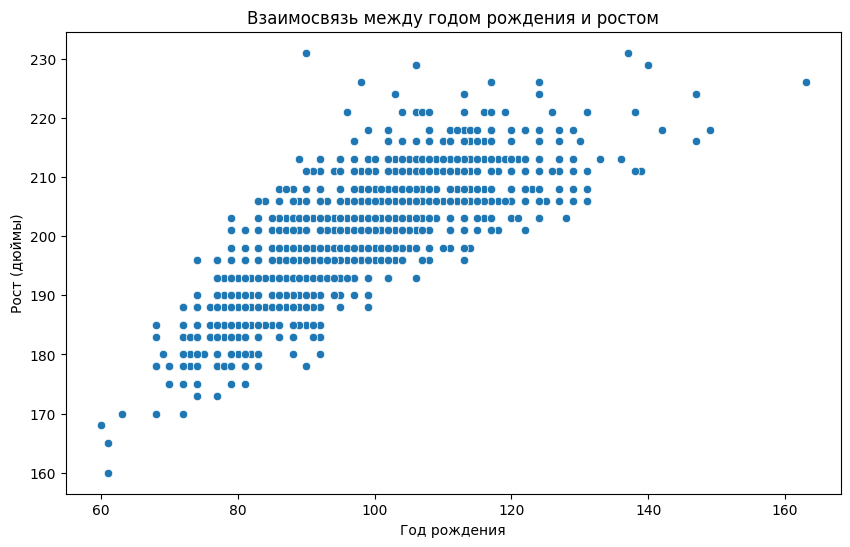

In [ ]:
# Взаимосвязь между годом рождения и ростом
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_Players['weight'], y=df_Players['height'])
plt.title('Взаимосвязь между годом рождения и ростом')
plt.xlabel('Год рождения')
plt.ylabel('Рост (дюймы)')
plt.show()

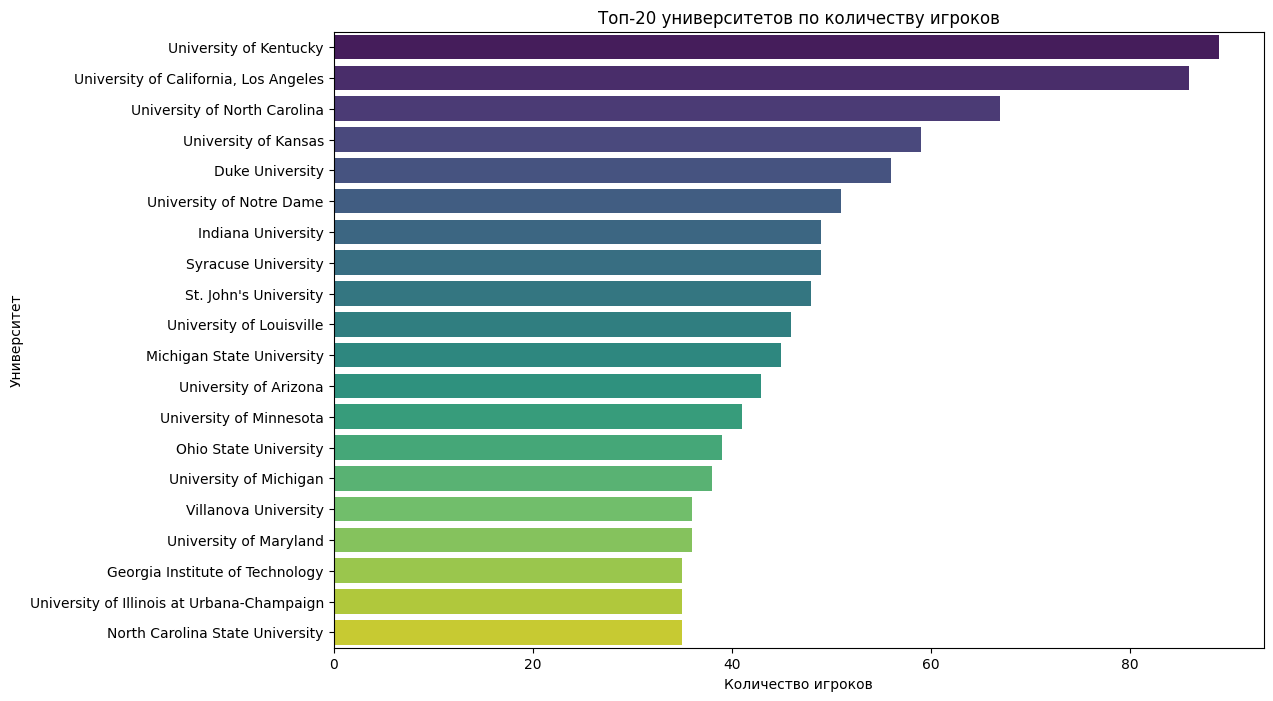

In [ ]:
# Распределение по университетам (первые 20 самых частых)
plt.figure(figsize=(12, 8))
top_20_colleges = df_Players['collage'].value_counts().head(20).reset_index()
top_20_colleges.columns = ['collage', 'count']
sns.barplot(x='count', y='collage', data=top_20_colleges, palette='viridis', hue='collage', dodge=False, legend=False)
plt.title('Топ-20 университетов по количеству игроков')
plt.xlabel('Количество игроков')
plt.ylabel('Университет')
plt.show()

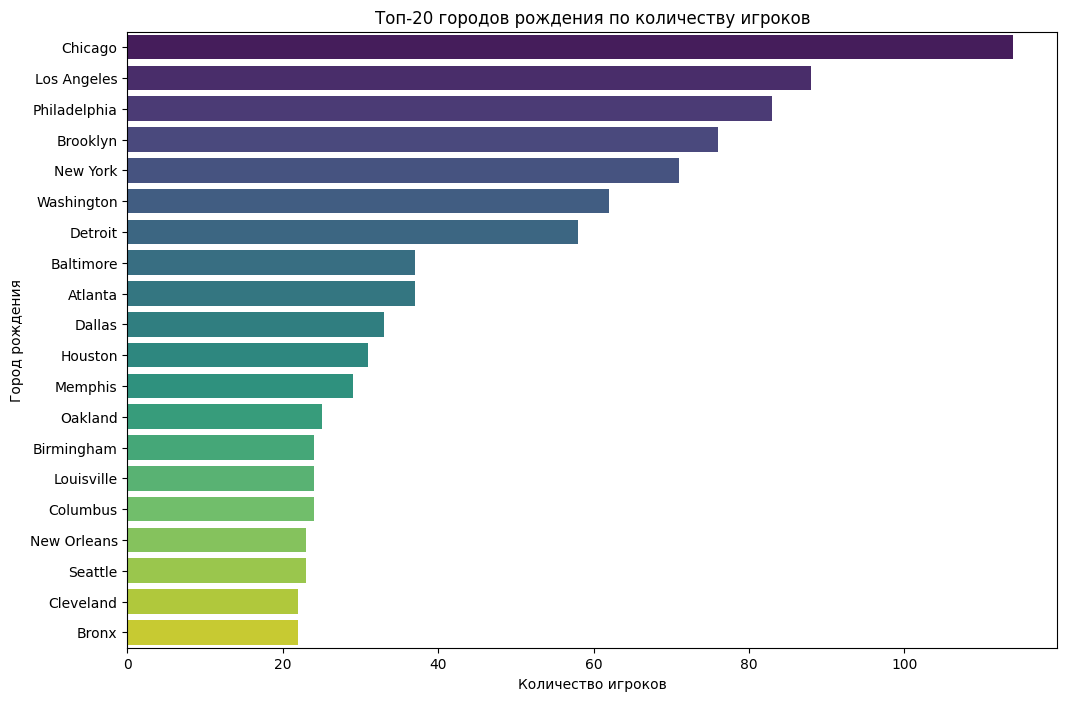

In [ ]:
# Распределение по городам рождения (первые 20 самых частых)
plt.figure(figsize=(12, 8))
top_20_birth_cities = df_Players['birth_city'].value_counts().head(20).reset_index()
top_20_birth_cities.columns = ['birth_city', 'count']
sns.barplot(x='count', y='birth_city', data=top_20_birth_cities, palette='viridis', hue='birth_city', dodge=False, legend=False)
plt.title('Топ-20 городов рождения по количеству игроков')
plt.xlabel('Количество игроков')
plt.ylabel('Город рождения')
plt.show()

In [ ]:
top_20_birth_cities

,birth_city,count
0,Chicago,114
1,Los Angeles,88
2,Philadelphia,83
3,Brooklyn,76
4,New York,71
5,Washington,62
6,Detroit,58
7,Baltimore,37
8,Atlanta,37
9,Dallas,33


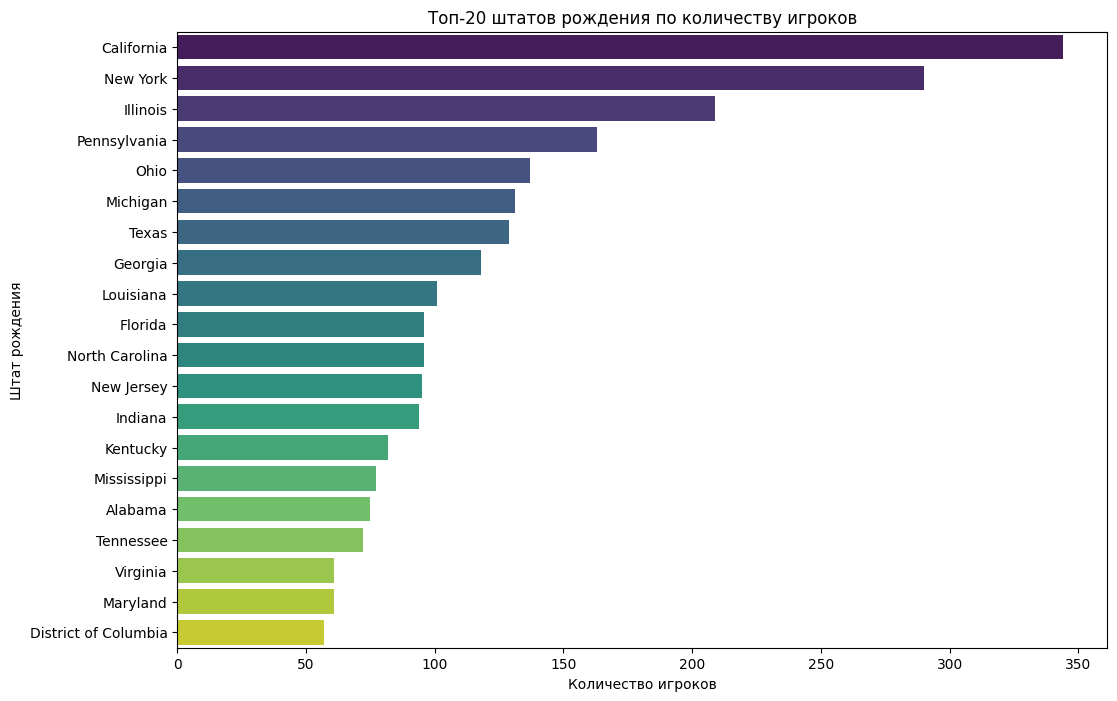

In [ ]:
# Распределение по штатам рождения (первые 20 самых частых)
plt.figure(figsize=(12, 8))
top_20_birth_states = df_Players['birth_state'].value_counts().head(20).reset_index()
top_20_birth_states.columns = ['birth_state', 'count']
sns.barplot(x='count', y='birth_state', data=top_20_birth_states, palette='viridis', hue='birth_state', dodge=False, legend=False)
plt.title('Топ-20 штатов рождения по количеству игроков')
plt.xlabel('Количество игроков')
plt.ylabel('Штат рождения')
plt.show()

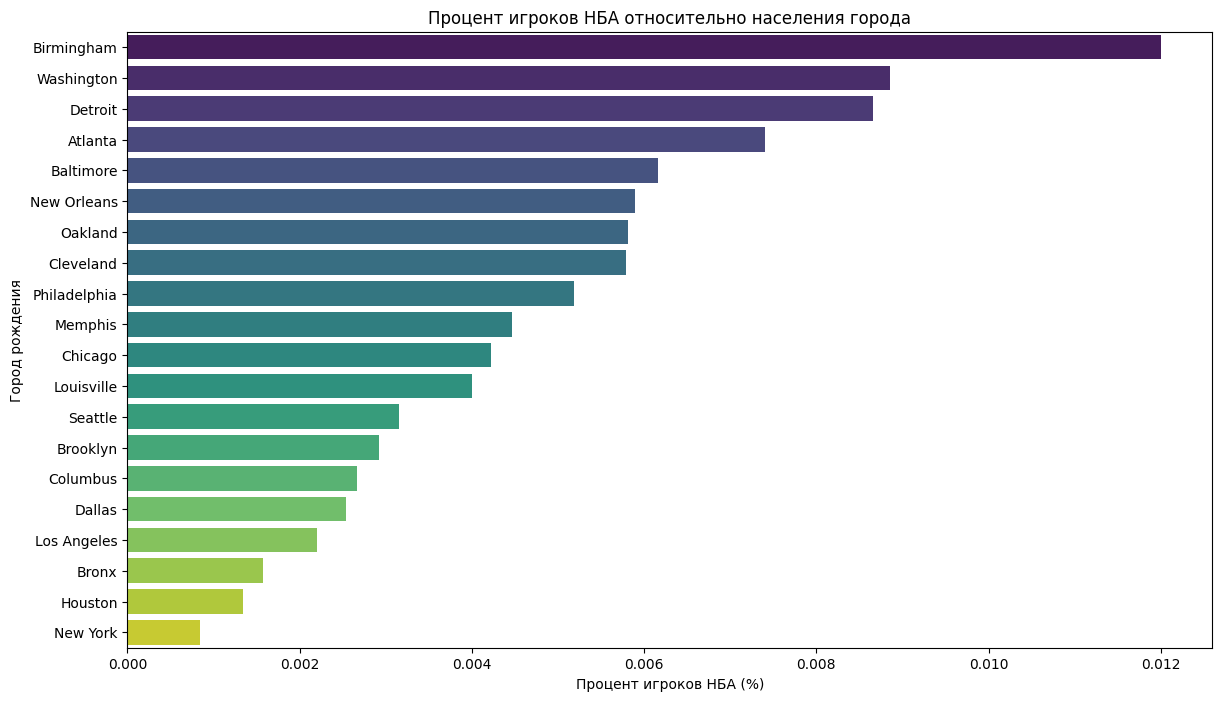

In [ ]:
# Данные о населении городов
city_population_data = {
    'birth_city': ['Atlanta', 'Baltimore', 'Birmingham', 'Bronx', 'Brooklyn', 'Chicago', 'Cleveland',
                   'Columbus', 'Dallas', 'Detroit', 'Houston', 'Los Angeles', 'Louisville', 'Memphis',
                   'New Orleans', 'New York', 'Oakland', 'Philadelphia', 'Seattle', 'Washington'],
    'population': [500000, 600000, 200000, 1400000, 2600000, 2700000, 380000, 900000, 1300000, 670000,
                   2300000, 4000000, 600000, 650000, 390000, 8400000, 430000, 1600000, 730000, 700000]
}

# Создаем DataFrame для населения городов
df_population = pd.DataFrame(city_population_data)

# Группируем игроков по городам рождения и считаем количество игроков из каждого города
df_birth_city_counts = df_Players['birth_city'].value_counts().reset_index()
df_birth_city_counts.columns = ['birth_city', 'count']

# Объединяем данные о количестве игроков и населении
df_combined = pd.merge(df_birth_city_counts, df_population, on='birth_city')

# Вычисляем процент игроков НБА относительно населения
df_combined['percent'] = (df_combined['count'] / df_combined['population']) * 100

# Сортируем DataFrame по проценту
df_combined = df_combined.sort_values(by='percent', ascending=False)

# Отрисовка графика
plt.figure(figsize=(14, 8))
sns.barplot(x='percent', y='birth_city', data=df_combined, palette='viridis', hue='birth_city', dodge=False, legend=False)
plt.title('Процент игроков НБА относительно населения города')
plt.xlabel('Процент игроков НБА (%)')
plt.ylabel('Город рождения')
plt.show()

### 3.2 Анализ таблицы `df_SS`

In [ ]:
df_SS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

Описание столбцов DataFrame `df_SS`
- **Year:** Год, в котором были собраны данные.
- **Player:** Имя игрока.
- **Pos:** Позиция игрока.
- **Age:** Возраст игрока.
- **Tm:** Команда, за которую играл игрок.
- **G:** Количество игр, в которых участвовал игрок.
- **GS:** Количество игр, в которых игрок начинал игру (начальный состав).
- **MP:** Количество минут, проведенных на площадке игроком.
- **PER:** Эффективность игрока по системе Player Efficiency Rating (PER).
- **TS%:** True Shooting Percentage - процент реального заброса.
- **3PAr:** Доля трехочковых бросков от общего числа бросков игрока.
- **FTr:** Free Throw Rate - количество попыток штрафных бросков на количество попыток бросков с игры.
- **ORB%:** Процент подборов в нападении.
- **DRB%:** Процент подборов в защите.
- **TRB%:** Процент общих подборов.
- **AST%:** Процент ассистов.
- **STL%:** Процент перехватов.
- **BLK%:** Процент блок-шотов.
- **TOV%:** Процент потерь мяча.
- **USG%:** Usage Percentage - процент использования игрока.
- **blanl:** Пустой столбец.
- **OWS:** Offensive Win Shares - оценка вклада игрока в победы своей команды на атаке.
- **DWS:** Defensive Win Shares - оценка вклада игрока в победы своей команды в защите.
- **WS:** Win Shares - общая оценка вклада игрока в победы своей команды.
- **WS/48:** Win Shares per 48 Minutes - оценка вклада игрока в победы своей команды на 48 минут игры.
- **blank2:** Пустой столбец.
- **OBPM:** Offensive Box Plus/Minus - оценка вклада игрока в атаке по системе Box Plus/Minus.
- **DBPM:** Defensive Box Plus/Minus - оценка вклада игрока в защите по системе Box Plus/Minus.
- **BPM:** Box Plus/Minus - общая оценка вклада игрока по системе Box Plus/Minus.
- **VORP:** Value over Replacement Player - оценка вклада игрока в победы своей команды по сравнению с заменой на среднего игрока.
- **FG:** Количество успешных бросков из поля.
- **FGA:** Количество попыток бросков из поля.
- **FG%:** Field Goal Percentage - процент успешных бросков из поля.
- **3P:** Количество успешных трехочковых бросков.
- **3PA:** Количество попыток трехочковых бросков.
- **3P%:** Three-Point Percentage - процент успешных трехочковых бросков.
- **2P:** Количество успешных двухочковых бросков.
- **2PA:** Количество попыток двухочковых бросков.
- **2P%:** Two-


In [ ]:
df_SS.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [ ]:
#корреляционный анализ
# Выбор только числовых столбцов
numeric_df = df_SS.select_dtypes(include=['float64', 'int64'])

# Замена пропусков средними значениями в числовых столбцах
numeric_df = numeric_df.apply(lambda x: x.fillna(x.mean()), axis=0)

# Вычисление корреляционной матрицы
corr_matrix = numeric_df.corr()


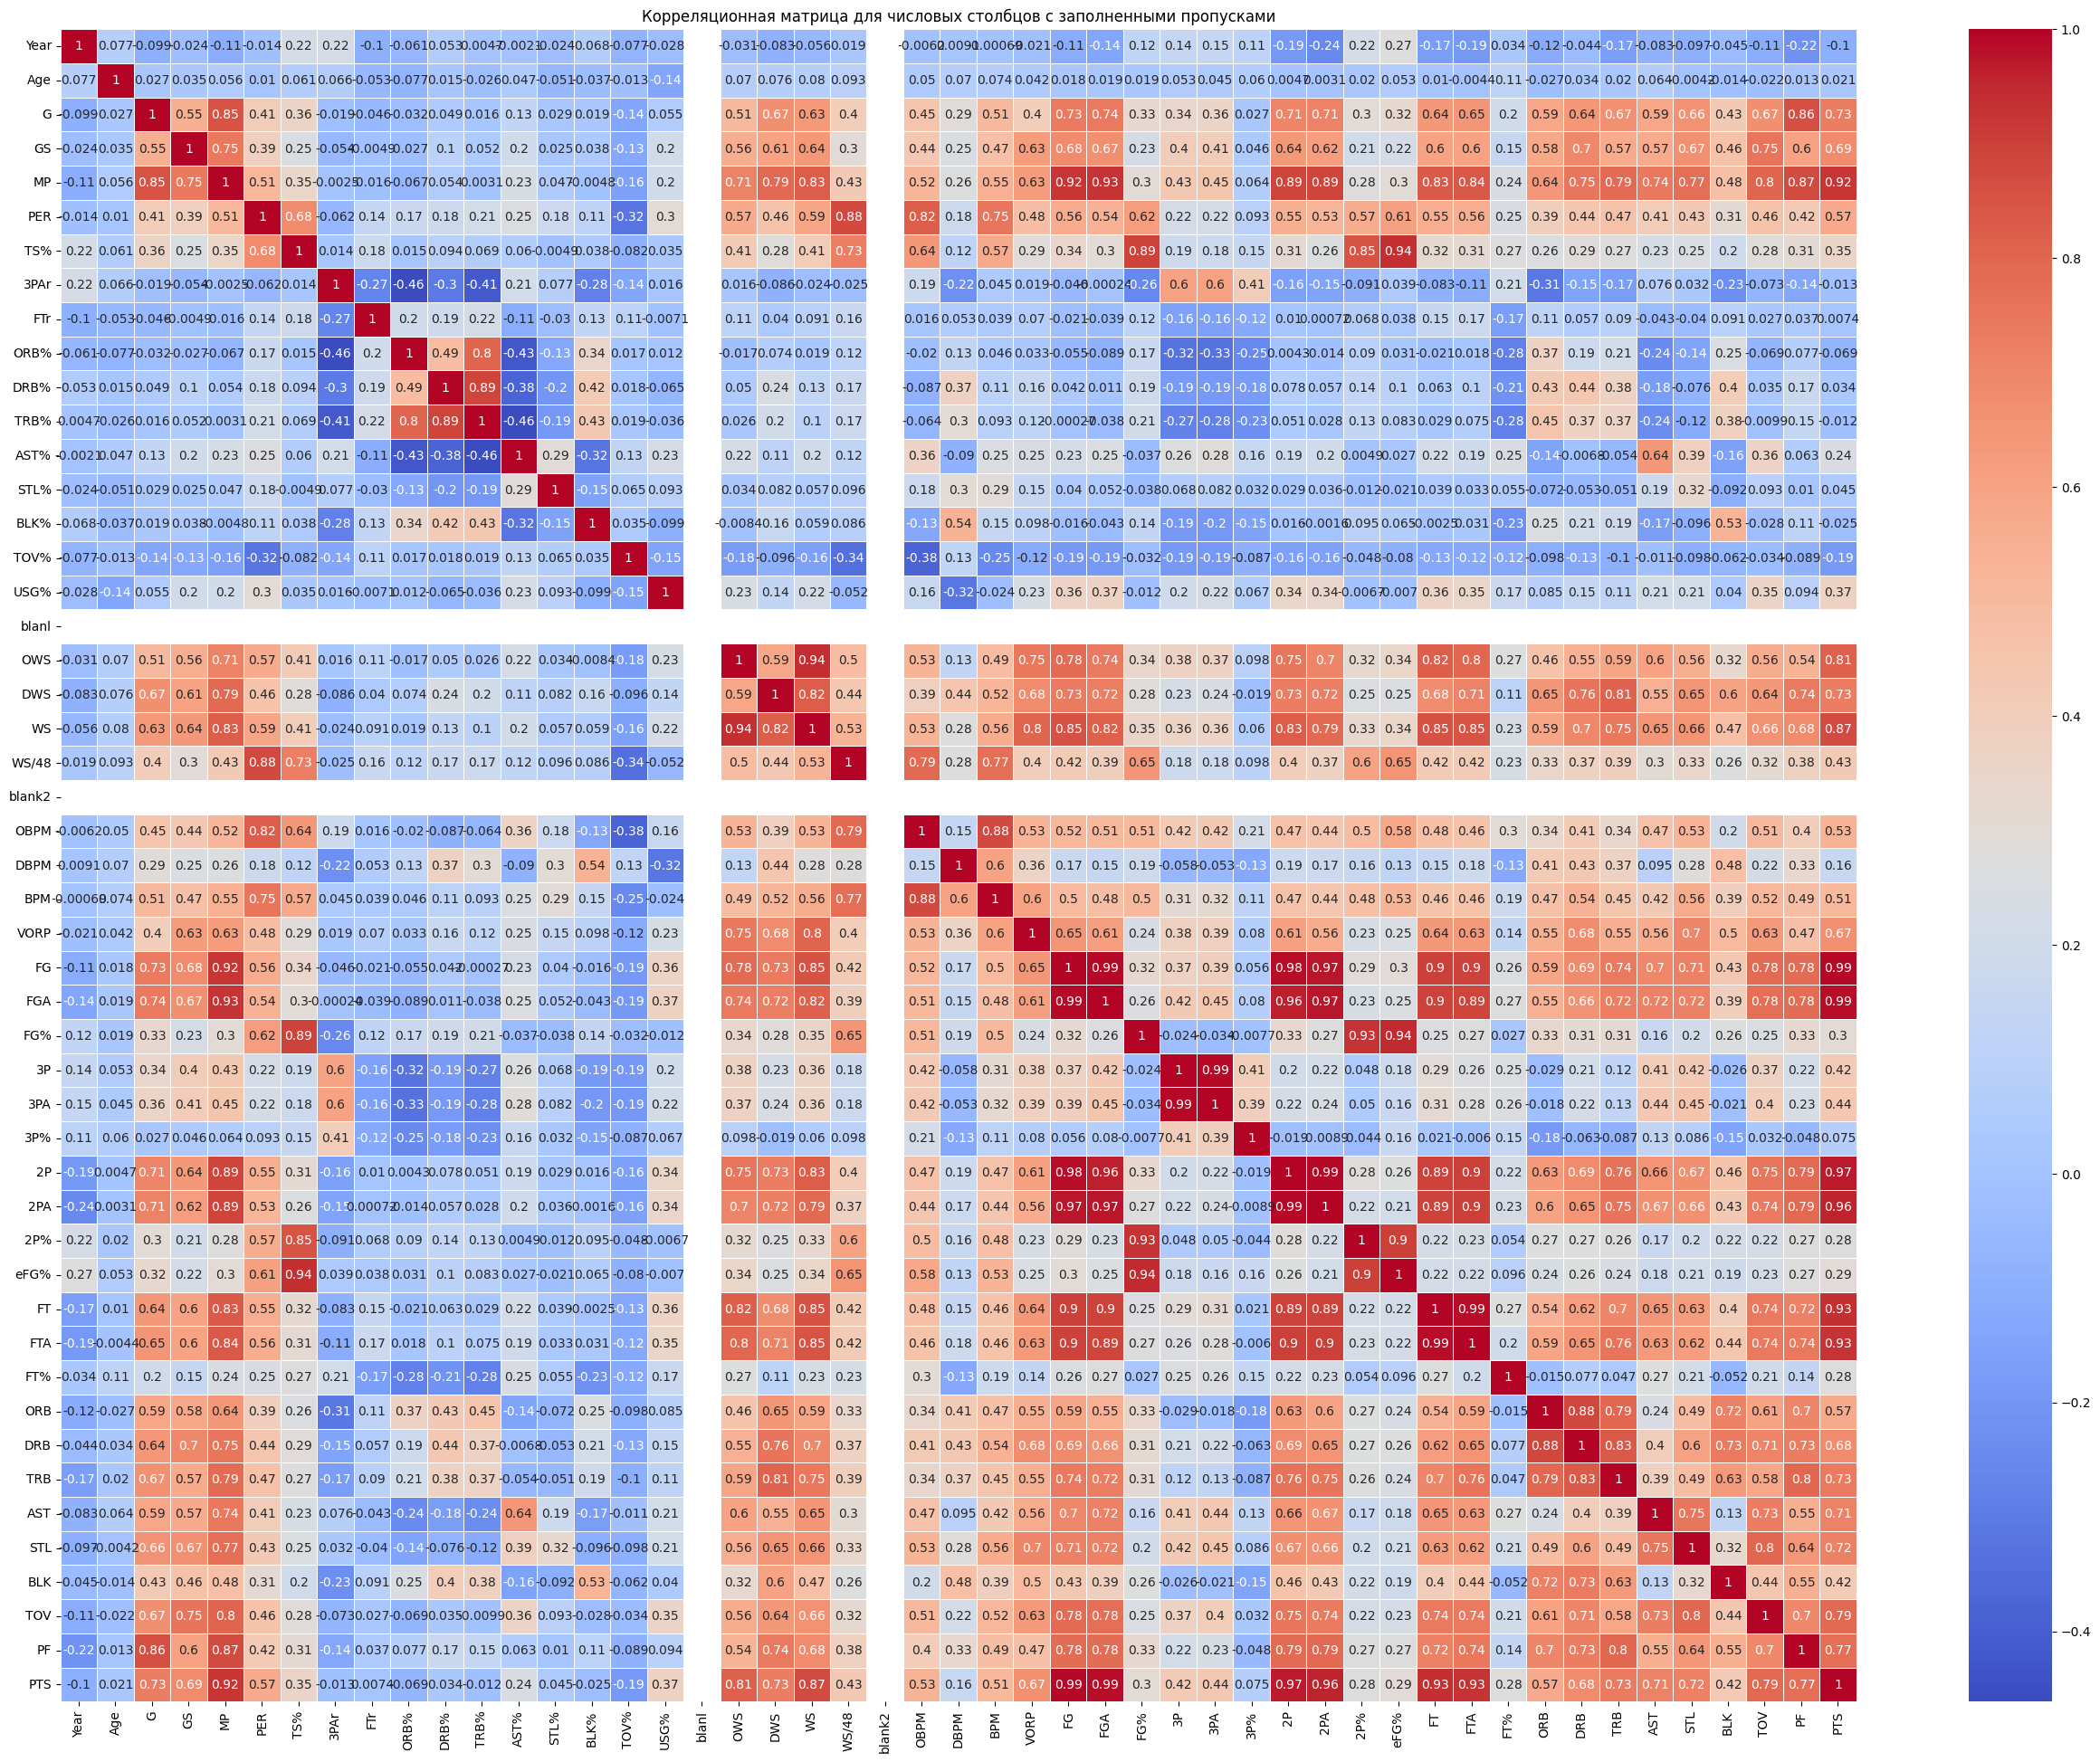

In [ ]:
# Построение тепловой карты корреляций
plt.figure(figsize=(32, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для числовых столбцов с заполненными пропусками')
plt.show()

## 4. Построение линейной регрессии

In [ ]:
df_SS.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [ ]:
# BPM: Box Plus/Minus - общая оценка вклада игрока по системе Box Plus/Minus.
target = "BPM"

In [ ]:
# Выберем только числовые признаки
numeric_features = df_SS.select_dtypes(include='number')

# Вычислим корреляцию между числовыми признаками и целевой переменной
correlation = numeric_features.corrwith(df_SS[target])

# Вычислим процент заполненности каждого признака
fill_percentage = (numeric_features.count() / len(df_SS)) * 100

# Создадим DataFrame с корреляцией и процентом заполненности
correlation_df = pd.DataFrame({'Correlation with ' + target: correlation, 'Fill Percentage': fill_percentage})

# Отсортируем DataFrame по столбцу "Correlation with BPM"
correlation_df_sorted = correlation_df.sort_values(by='Correlation with ' + target, ascending=False)
correlation_df_sorted

features = [
    'MP',
    'TS%',
    'STL%',
    'FGA',
    'FG',
    'G',
    '2P%',
    'AST%',
    '3P%',
    'TOV%'
]

,Correlation with BPM,Fill Percentage
BPM,1.000000,84.229071
OBPM,0.880075,84.229071
WS/48,0.847609,97.610465
PER,0.799141,97.610465
TS%,0.641641,99.380341
WS,0.632550,99.570694
VORP,0.602848,84.229071
eFG%,0.601952,99.327690
DBPM,0.600775,84.229071
MP,0.596756,97.760318


In [ ]:
target = "BPM"

features = [
    'TS%',
    'STL%',
    'FG',
    'AST%',
    'TOV%',
    # 'MP',
    # 'FG%',
    # 'G',
    # '2P%',
]

correlation_df_sorted.loc[features + [target]]

,Correlation with BPM,Fill Percentage
TS%,0.641641,99.380341
STL%,0.287078,84.208821
FG,0.556048,99.728646
AST%,0.254630,91.349075
TOV%,-0.254359,79.308250
BPM,1.000000,84.229071


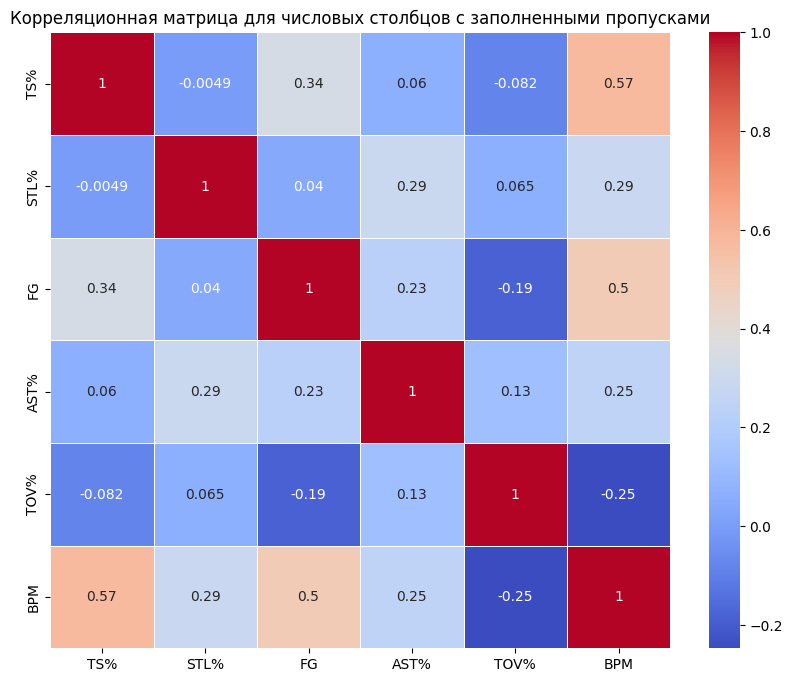

In [ ]:
#корреляционный анализ
# Выбор только числовых столбцов
numeric_df = df_SS[features + [target]].select_dtypes(include=['float64', 'int64'])

# Замена пропусков средними значениями в числовых столбцах
numeric_df = numeric_df.apply(lambda x: x.fillna(x.mean()), axis=0)

# Вычисление корреляционной матрицы
corr_matrix = numeric_df.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для числовых столбцов с заполненными пропусками')
plt.show()

In [ ]:
df = df_SS[df_SS['Year'] == 2017].drop_duplicates('Player', keep='last')[features + [target]]

In [ ]:
df_SS.dropna(subset=['BPM'], inplace=True)
df_SS.sort_values(by='BPM')[['Player','BPM']]

,Player,BPM
14279,Gheorghe Muresan,-86.7
18443,Mile Ilic,-53.6
8666,Michael Wilson,-50.2
23280,Toure' Murry,-50.0
14504,Mario Bennett,-49.5
...,...,...
17164,Jackie Butler,21.5
22600,DeAndre Liggins,24.8
22919,Sim Bhullar,26.6
11855,Darrell Armstrong,34.8


In [ ]:
target = "BPM"

features = [
    'TS%',
    'STL%',
    'FG',
    'AST%',
    'TOV%',
    # 'MP',
    # 'FG%',
    # 'G',
    # '2P%',
]

df

,TS%,STL%,FG,AST%,TOV%,BPM
24096,0.560,1.7,134.0,5.5,8.3,-2.5
24099,0.587,1.3,65.0,5.4,9.6,-1.8
24100,0.589,1.8,374.0,5.4,16.0,0.5
24101,0.559,0.7,185.0,7.4,8.4,-3.5
24102,0.529,1.7,89.0,3.1,13.7,-4.1
...,...,...,...,...,...,...
24686,0.604,1.8,253.0,9.1,10.9,2.1
24687,0.508,0.7,78.0,12.2,10.2,-2.5
24688,0.346,0.9,10.0,5.3,8.3,-7.3
24689,0.503,0.9,88.0,6.1,14.4,-3.7


In [ ]:
# Удаляем строки с пропущенными значениями в целевой переменной
df.dropna(subset=['BPM'], inplace=True)

# Заменяем пропущенные значения в признаках на среднее значение
df.fillna(df.mean(), inplace=True)

# Удаляем строки, где значения целевой переменной (BPM) больше 10 или меньше -10
df = df.loc[(df['BPM'] <= 10) & (df['BPM'] >= -10)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 24096 to 24690
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TS%     466 non-null    float64
 1   STL%    466 non-null    float64
 2   FG      466 non-null    float64
 3   AST%    466 non-null    float64
 4   TOV%    466 non-null    float64
 5   BPM     466 non-null    float64
dtypes: float64(6)
memory usage: 25.5 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error



# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(columns=['BPM'])
y = df['BPM']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование значений на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Root Mean Squared Error (RMSE): 1.9078060659798552
Mean Absolute Percentage Error (MAPE): 1.1070515158571157
Mean Squared Error (MSE): 3.639723985389532
Mean Absolute Error (MAE): 1.400108144322512
R-squared (R2): 0.6241912417758093


<Axes: >

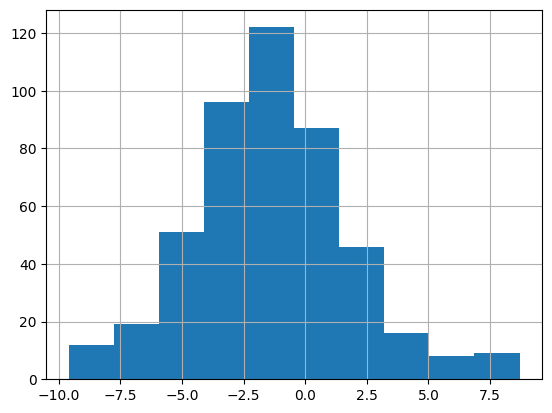

In [ ]:
y.hist()

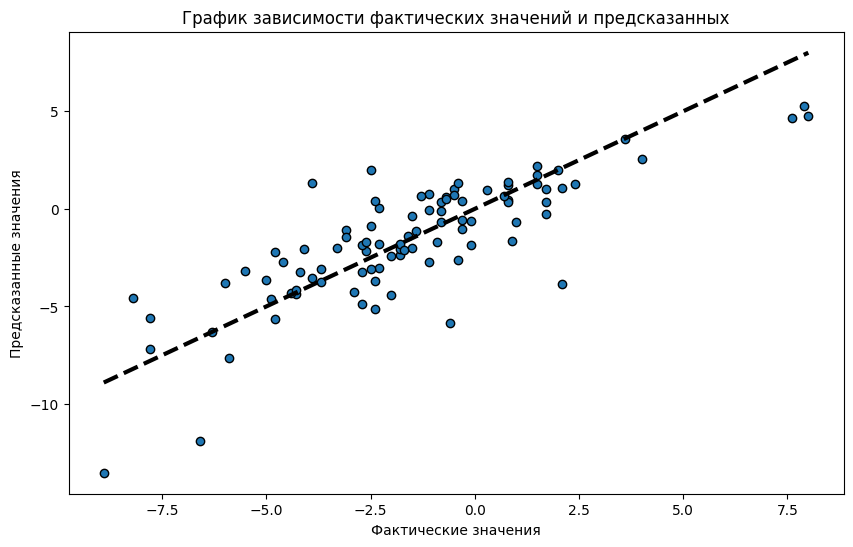

In [ ]:
# Построение графика зависимости факта и предсказания
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('График зависимости фактических значений и предсказанных')
plt.show()

In [ ]:
import statsmodels.api as sm
# Создание и обучение модели линейной регрессии
model = sm.OLS(y_train, X_train).fit()

# Прогнозирование значений на тестовом наборе
y_pred = model.predict(X_test)

# Вывод отчета о модели
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    BPM   R-squared (uncentered):                   0.343
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                              38.35
Date:                Wed, 22 May 2024   Prob (F-statistic):                    1.22e-31
Time:                        15:55:58   Log-Likelihood:                         -909.76
No. Observations:                 372   AIC:                                      1830.
Df Residuals:                     367   BIC:                                      1849.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 5. Feature engineering

In [57]:
target = "BPM"

features = [
    'G',
    'GS',
    'MP',
    'FTr',
    'OWS',
    'DWS',
    'FG',
    'FGA',
    'FG%',
    '3P',
    '3PA',
    '3P%',
    '2P',
    '2PA',
    '2P%',
    'eFG%',
    'FT',
    'FTA',
    'FT%',
    'ORB',
    'DRB',
    'TRB',
    'AST',
    'STL',
    'BLK',
    'TOV',
    'PF',
    'PTS'
]

In [ ]:
# Определение числовых столбцов
numeric_columns = df_SS.select_dtypes(include=['float64', 'int64']).columns

# Заполнение пропусков средними значениями для числовых столбцов
df_SS[numeric_columns] = df_SS[numeric_columns].fillna(df_SS[numeric_columns].mean())

# Проверка информации о датафрейме после заполнения пропусков
df_SS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24691 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24691 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24691 non-null  float64
 7   GS          24691 non-null  float64
 8   MP          24691 non-null  float64
 9   PER         24691 non-null  float64
 10  TS%         24691 non-null  float64
 11  3PAr        24691 non-null  float64
 12  FTr         24691 non-null  float64
 13  ORB%        24691 non-null  float64
 14  DRB%        24691 non-null  float64
 15  TRB%        24691 non-null  float64
 16  AST%        24691 non-null  float64
 17  STL%        24691 non-null  float64
 18  BLK%        24691 non-null  float64
 19  TOV%        24691 non-nul

In [14]:

# Группировка данных по игроку и году для учета уникальных сезонов
unique_seasons = df_SS.groupby('Player')['Year'].nunique()

# Преобразование в датафрейм для наглядности
df_seasons = unique_seasons.reset_index()
df_seasons.columns = ['Player', 'Number of Seasons']

# Объединение с исходным датафреймом для добавления нового столбца
df_SS = df_SS.merge(df_seasons, on='Player', how='left')
df_SS


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Number of Seasons
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,23.593375,1209.720317,12.479071,...,62.18921,147.199404,224.637381,176.0,39.897052,24.47026,73.939832,217.0,458.0,2.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,23.593375,1209.720317,12.479071,...,62.18921,147.199404,224.637381,109.0,39.897052,24.47026,73.939832,99.0,279.0,3.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,23.593375,1209.720317,12.479071,...,62.18921,147.199404,224.637381,140.0,39.897052,24.47026,73.939832,192.0,438.0,5.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,23.593375,1209.720317,12.479071,...,62.18921,147.199404,224.637381,20.0,39.897052,24.47026,73.939832,29.0,63.0,2.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,23.593375,1209.720317,12.479071,...,62.18921,147.199404,224.637381,20.0,39.897052,24.47026,73.939832,27.0,59.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.000000,1725.000000,16.700000,...,135.00000,270.000000,405.000000,99.0,62.000000,58.00000,65.000000,189.0,639.0,4.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.000000,525.000000,13.000000,...,43.00000,81.000000,124.000000,42.0,7.000000,21.00000,20.000000,61.0,178.0,5.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.000000,108.000000,7.300000,...,11.00000,24.000000,35.000000,4.0,2.000000,5.00000,3.000000,17.0,23.0,1.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.000000,843.000000,6.900000,...,15.00000,110.000000,125.000000,36.0,15.000000,16.00000,40.000000,78.0,240.0,1.0


In [16]:
# Вычисление корреляции между `Number of Seasons` и `таргетом`
correlation = df_SS['Number of Seasons'].corr(df_SS['BPM'])
correlation

0.36602325827268284

In [21]:
# Объединение датафреймов по столбцу 'Player'
df_combined = pd.merge(df_SS, df_Players, on='Player', how='left')

# Вычисление произведения роста и веса
df_combined['Height_Weight_Product'] = df_combined['height'] * df_combined['weight']

# Нормализация столбца Height_Weight_Product
mean_height_weight_product = df_combined['Height_Weight_Product'].mean()
std_height_weight_product = df_combined['Height_Weight_Product'].std()

df_combined['Normalized_Height_Weight_Product'] = (df_combined['Height_Weight_Product'] - mean_height_weight_product) / std_height_weight_product
df_combined

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,PTS,Number of Seasons,height,weight,collage,born,birth_city,birth_state,Height_Weight_Product,Normalized_Height_Weight_Product
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,23.593375,1209.720317,12.479071,...,458.0,2.0,180.0,77.0,Indiana University,1918.0,NaN,NaN,13860.0,-1.662251
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,23.593375,1209.720317,12.479071,...,279.0,3.0,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,15604.0,-1.113560
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,23.593375,1209.720317,12.479071,...,438.0,5.0,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,16598.0,-0.800831
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,23.593375,1209.720317,12.479071,...,63.0,2.0,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,17248.0,-0.596330
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,23.593375,1209.720317,12.479071,...,59.0,2.0,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,17248.0,-0.596330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.000000,1725.000000,16.700000,...,639.0,4.0,213.0,108.0,Indiana University,1992.0,Washington,Indiana,23004.0,1.214603
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.000000,525.000000,13.000000,...,178.0,5.0,213.0,114.0,University of North Carolina,1990.0,Visalia,California,24282.0,1.616683
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.000000,108.000000,7.300000,...,23.0,1.0,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee,23004.0,1.214603
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.000000,843.000000,6.900000,...,240.0,1.0,203.0,97.0,NaN,1994.0,Heidelberg,Germany,19691.0,0.172278


In [22]:
# Добавление нормализованного столбца обратно в df_SS
df_SS['Normalized_Height_Weight_Product'] = df_combined['Normalized_Height_Weight_Product']
df_SS

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Number of Seasons,Normalized_Height_Weight_Product
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,23.593375,1209.720317,12.479071,...,147.199404,224.637381,176.0,39.897052,24.47026,73.939832,217.0,458.0,2.0,-1.662251
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,23.593375,1209.720317,12.479071,...,147.199404,224.637381,109.0,39.897052,24.47026,73.939832,99.0,279.0,3.0,-1.113560
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,23.593375,1209.720317,12.479071,...,147.199404,224.637381,140.0,39.897052,24.47026,73.939832,192.0,438.0,5.0,-0.800831
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,23.593375,1209.720317,12.479071,...,147.199404,224.637381,20.0,39.897052,24.47026,73.939832,29.0,63.0,2.0,-0.596330
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,23.593375,1209.720317,12.479071,...,147.199404,224.637381,20.0,39.897052,24.47026,73.939832,27.0,59.0,2.0,-0.596330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.000000,1725.000000,16.700000,...,270.000000,405.000000,99.0,62.000000,58.00000,65.000000,189.0,639.0,4.0,1.214603
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.000000,525.000000,13.000000,...,81.000000,124.000000,42.0,7.000000,21.00000,20.000000,61.0,178.0,5.0,1.616683
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.000000,108.000000,7.300000,...,24.000000,35.000000,4.0,2.000000,5.00000,3.000000,17.0,23.0,1.0,1.214603
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.000000,843.000000,6.900000,...,110.000000,125.000000,36.0,15.000000,16.00000,40.000000,78.0,240.0,1.0,0.172278


In [26]:
# Вычисление корреляции между `Normalized_Height_Weight_Produc` и `таргетом`
correlation = df_SS['Normalized_Height_Weight_Product'].corr(df_SS['BPM'])
correlation

0.01533348553376836

In [47]:
# вычисляем кореляцию свойт отночительно BPM
correlation = df_SS[features].corrwith(df_SS['BPM'])
correlation_sorted = correlation.abs().sort_values(ascending=False)
correlation_sorted

STL     0.563629
MP      0.546896
DRB     0.541250
eFG%    0.531310
DWS     0.523109
TOV     0.515408
PTS     0.509168
G       0.505796
FG%     0.504582
FG      0.501361
OWS     0.493700
PF      0.485860
FGA     0.484252
2P%     0.477074
GS      0.474681
ORB     0.471261
2P      0.467475
FTA     0.460183
FT      0.458157
TRB     0.448714
2PA     0.442518
AST     0.424264
BLK     0.393947
3PA     0.317924
3P      0.311128
FT%     0.185249
3P%     0.112401
FTr     0.038611
dtype: float64

In [56]:
df_SS['PTS_per_MP'] = df_SS['PTS'] / df_SS['MP']

# Вычисление корреляции между `PTS` и `таргетом`
correlation = df_SS['PTS_per_MP'].corr(df_SS['BPM'])
correlation

0.37211606127543434